In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from perceptron import Perceptron

In [92]:
data = pd.read_csv("CSV/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [93]:
data["Sex"] = data["Sex"].replace(["F", "M"], [0, 1])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


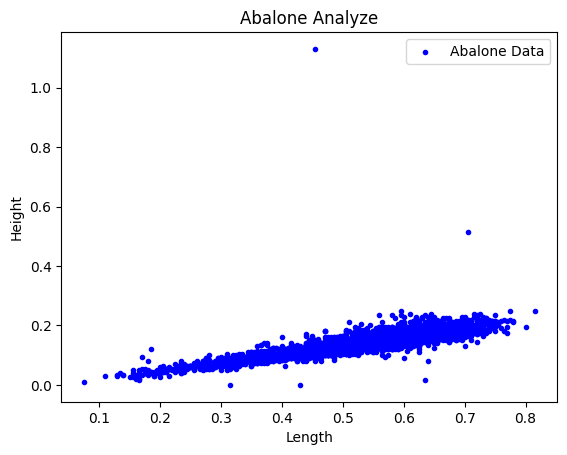

In [94]:
X = data["Length"].values.reshape(-1, 1)
Y = data["Height"].values.reshape(-1, 1)
plt.scatter(X, Y, color = "blue", marker = ".", label="Abalone Data")
plt.title("Abalone Analyze")
plt.xlabel("Length")
plt.ylabel("Height")
plt.legend()
plt.show()

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [96]:
perceptron = Perceptron(input_size=1, lr=0.001, epochs=100)
perceptron.fit(X_train, Y_train)

In [97]:
mse = perceptron.evaluate(X_test, Y_test)
print("Mean Squared Error on Test Data (MSE):", mse)

Mean Squared Error on Test Data (MSE): 0.002751271081576551


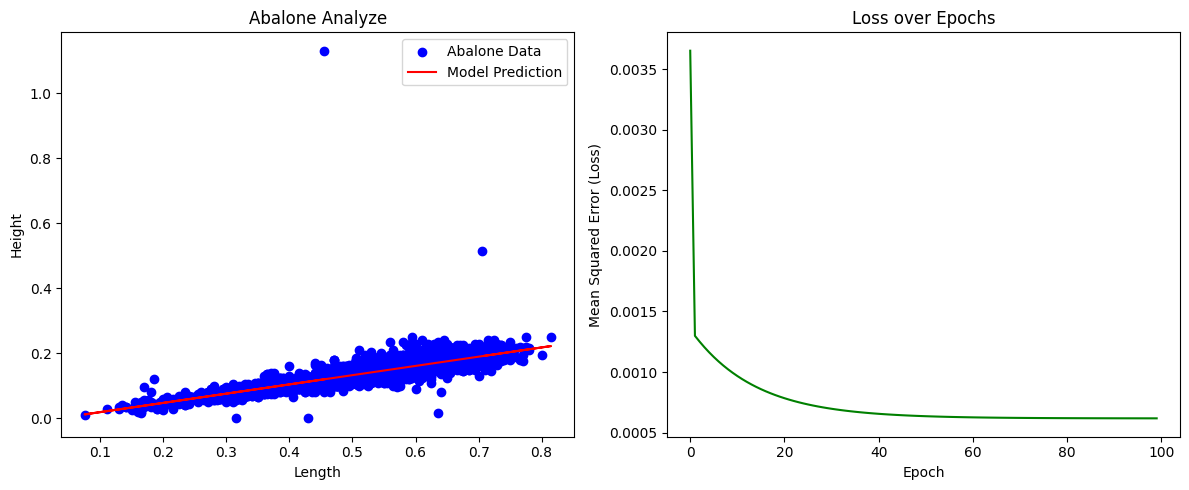

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X, Y, color="blue", label="Abalone Data")
axs[0].plot(X, perceptron.predict(X), color="red", label="Model Prediction")
axs[0].set_title("Abalone Analyze")
axs[0].set_xlabel("Length")
axs[0].set_ylabel("Height")
axs[0].legend()

axs[1].plot(range(perceptron.epochs), perceptron.loss_history, color="green")
axs[1].set_title("Loss over Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Mean Squared Error (Loss)")
plt.tight_layout()
plt.show()